In [2]:
#
# Notebook made by Andre A. Goncalves
# Registro
#

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [128]:
# mean energy cost in USD/MWh
# Data taken from the presentation slide
means_solar = np.array([29.8, 20.7, 16.3])
means_wind = np.array([24.3, 21.9, 19.0])
total_mean = (means_solar + means_wind)/2
total_mean

array([27.05, 21.3 , 17.65])

In [129]:
production_rate = 0.050 # in MWh/kg
efficiency_factor = 0.63
true_means = total_mean * production_rate
true_means

array([1.3525, 1.065 , 0.8825])

Text(0, 0.5, 'Custo de energia em USD por kg de H2')

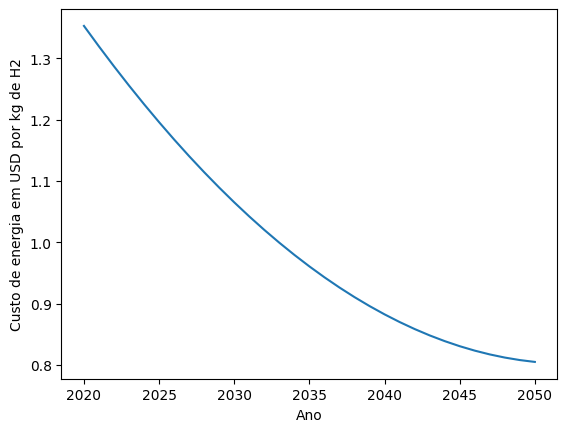

In [133]:
# making prediction of energy costs based on parabolic regression (to consider curvature and avoid Runge phenomenon)
energy_costs = np.polynomial.Polynomial.fit(np.array([2020, 2030, 2040]), true_means, 2)
plt.plot(range(2020, 2051), [energy_costs(i) for i in range(2020, 2051)])
plt.xlabel('Ano')
plt.ylabel('Custo de energia em USD por kg de H2')

Text(0, 0.5, 'Custo de Eletrólito em USD por kg de H2')

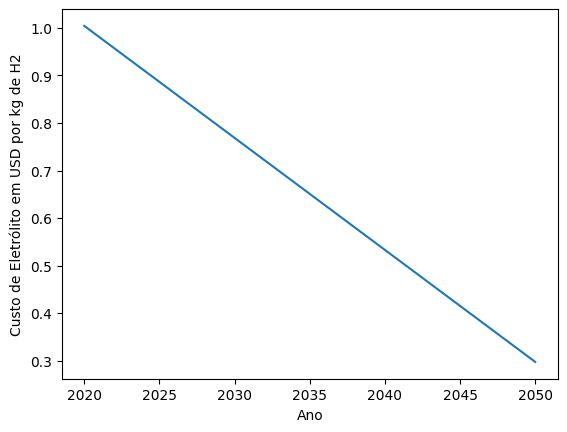

In [134]:
# Make electrolysis CAPEX cost base on linear regression
electrolysis_costs = np.polynomial.Polynomial.fit(np.array([2020, 2030, 2050]), np.array([1.11, 0.61, 0.35]), 1)
plt.plot(range(2020, 2051), [electrolysis_costs(i) for i in range(2020, 2051)])
plt.xlabel('Ano')
plt.ylabel('Custo de Eletrólito em USD por kg de H2')

In [149]:
energy_levelized = 0
electro_levelized = 0
transport = 0
conv_reconv = 0

discount = 0
r = 0.08
for year in range(2030, 2051):
    energy_levelized += energy_costs(year) / efficiency_factor / (1 + r)**(year - 2030)
    electro_levelized += electrolysis_costs(year) / efficiency_factor / (1 + r)**(year - 2030)
    transport += (2.17) / (1 + r)**(year - 2030)
    conv_reconv += (2.42) / (1 + r)**(year - 2030)
    discount += (1+r)**(2030 - year)
print('Levelized Energy Cost')
print('\t\tUSD', round(energy_levelized/discount, 2), '/kg H2')
print('Levelized Electrolyzer Cost')
print('\t\tUSD', round(electro_levelized/discount, 2), '/kg H2')
print('Levelized Transportation Cost')
print('\t\tUSD', round(transport/discount, 2), '/kg H2')
print('Levelized Convertion Cost')
print('\t\tUSD', round(conv_reconv/discount, 2), '/kg H2')
print('Total Profit')
print('\t\t', round((8 - ((energy_levelized + electro_levelized + transport + conv_reconv)/discount))/0.08, 1), '%')

Levelized Energy Cost
		USD 1.49 /kg H2
Levelized Electrolyzer Cost
		USD 0.95 /kg H2
Levelized Transportation Cost
		USD 2.17 /kg H2
Levelized Convertion Cost
		USD 2.42 /kg H2
Total Profit
		 12.2 %
